<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Prelim/HOA%203.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 3.1** | **LOGISTIC REGRESSION**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 9/24/2024
**Date Submitted**: | 9/25/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 3.1 Logistic Regression

#### Objective(s):

This activity aims to solve classification problem using logistic regression

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to train and predict classification model using logistic regression.
* Demonstrate how to evaluate the performance of the logistic regression.
* Demonstrate how to visualize the performance of the logistic regression.

#### Resources:
* Jupyter Notebook
* Titanic





#### Procedure:

Import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data using Pandas and check the content of the dataframe

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the missing data.
Use seaborn to create a simple heatmap to see where  are the missing data

<Axes: >

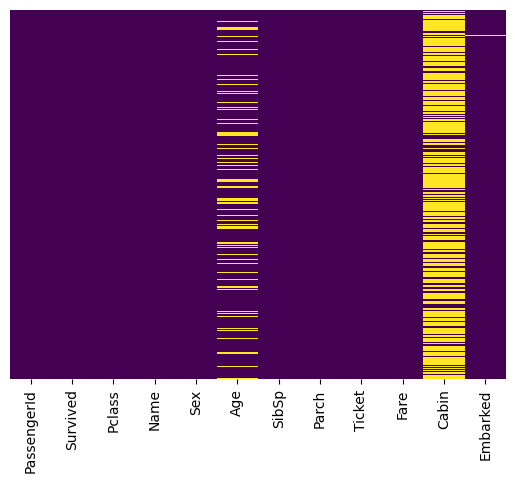

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are 20% of Age data is missing. We need to replace the missing data with some of imputation.
The Cabin column are also missing too much of that data.

Use data visualization to analyze the data

<ipython-input-5-05742e5567b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

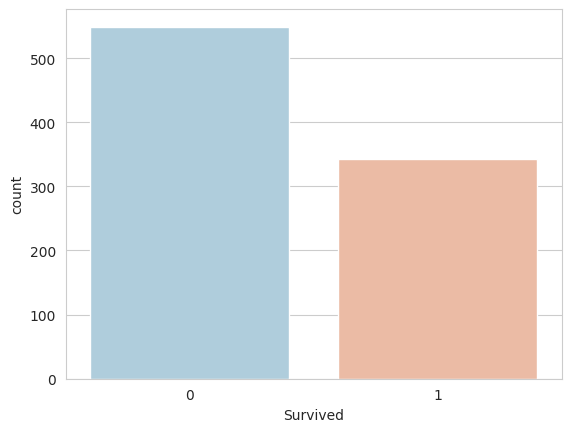

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

Interpret the result of the graph

<font color = "blue"> The graph shows that there are around 1000 data points where there are around 600 who had not survived the titanic and around 400 survived. </font>

<Axes: xlabel='Survived', ylabel='count'>

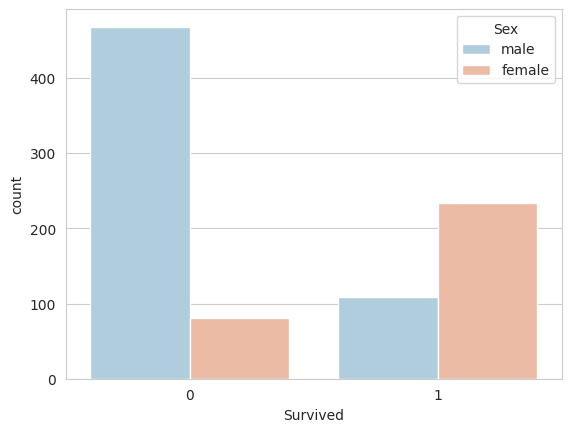

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Interpret the result of the graph.

<font color = "blue"> The graph shows that most of the males did not survive the titanic while a considerable amount of females did survive the titanic. </font>

<Axes: xlabel='Survived', ylabel='count'>

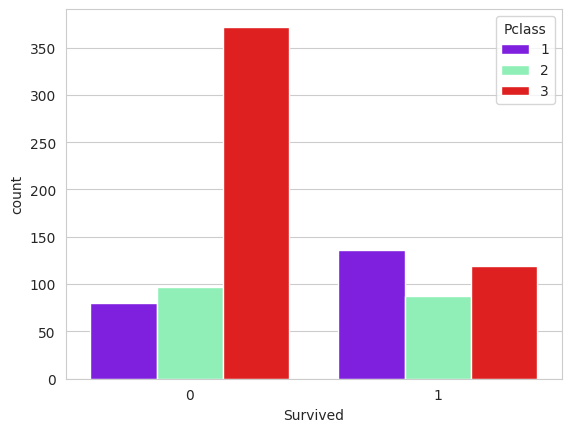

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Interpret the result.

<font color = "blue"> The graph suggests that being in a higher passenger class such as the 1st class has a higher chance of you surviving the titanic compared to the 3rd class, which has a considerable amount of people not surviving.</font>

<ipython-input-8-53c281d34688>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

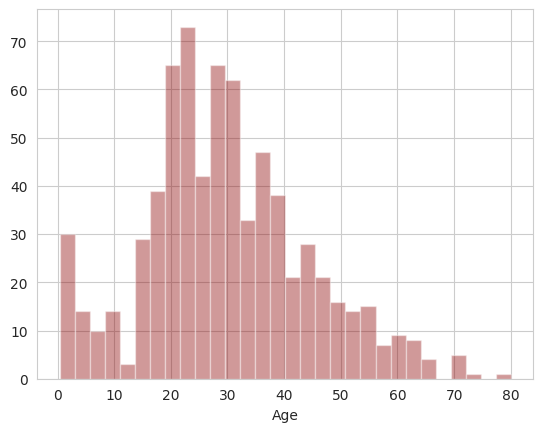

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

Interpret the result of the graph.

<font color = "blue"> The graph shows that most of the passengers are younger (around age 20-35) and there are more younger people compared to older people (age >60). </font>

In [9]:
import cufflinks as cf
cf.go_offline()

In [10]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

Replace the missing data of the Age column. One way to do this is by filling in the mean age of all the passengers (imputation).


<ipython-input-11-551bc5ec5847>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

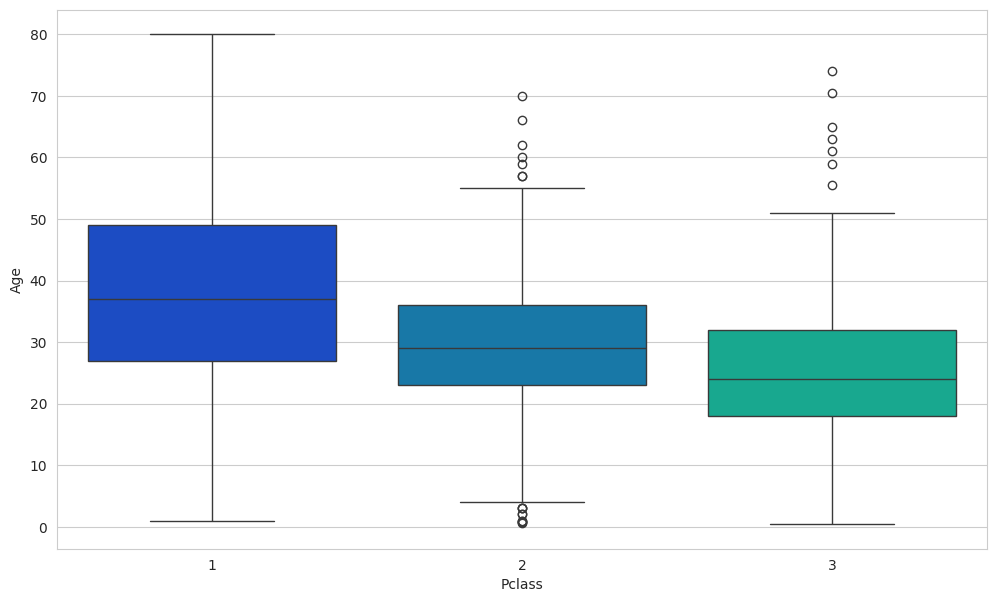

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [12]:
#create a function to replace the missing data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [13]:
#apply the function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-12-fd2656a82d91>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-12-fd2656a82d91>:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

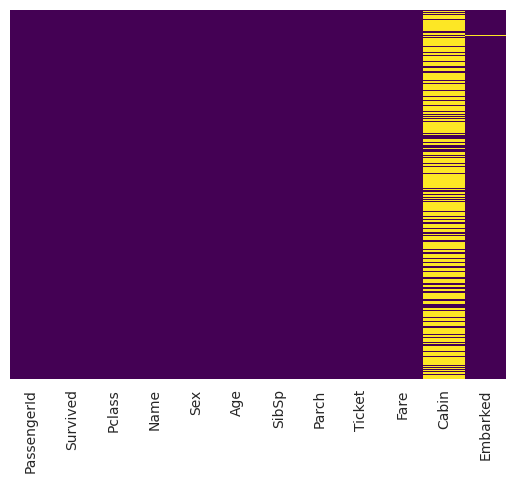

In [14]:
#check the missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN.

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
#drop NaN
train.dropna(inplace=True)

Convert categorical features to dummy variables using pandas

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Build the Logistic Regression Model

Split the data into a training set and test set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

Train the model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Predict the values for the testing data

In [26]:
predictions = logmodel.predict(X_test)

Check precision,recall,f1-score using classification report

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



Interpret the precision, recall f1-score

<font color = "blue"> The model has a high precision but low recall on the yes, while having a high recall but low precision on the no. This suggests that the model is generally just predicting no, without enough sensitivity to the prediction of yes. This is supported by the f1-score which is slightly higher on the not surviving compared to the surviving.</font>

Evaluate the accuracy and confusion matrix of the model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [30]:
print(accuracy_score(y_test, predictions))

0.797752808988764


In [31]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 39,  65]])

<Axes: xlabel='Predicted', ylabel='Actual'>

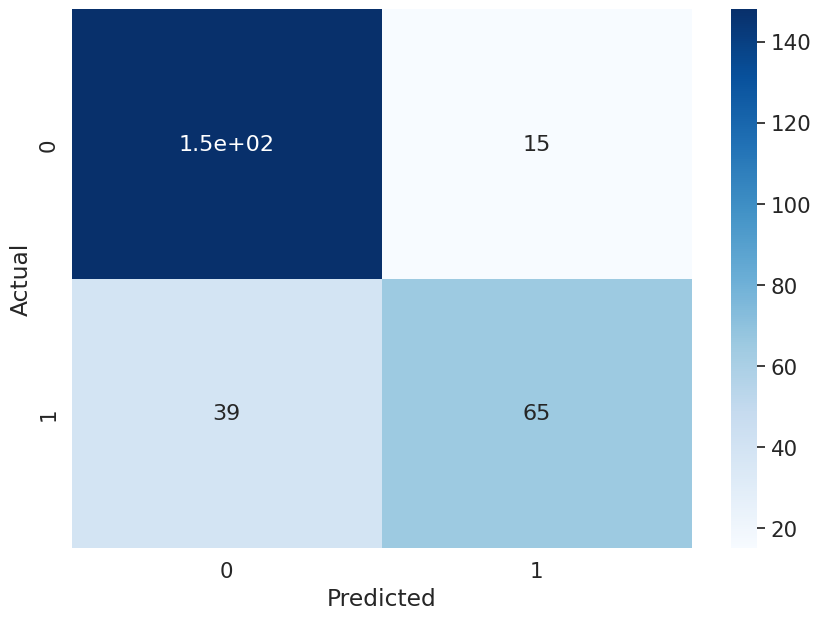

In [32]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(predictions))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Solve classification problem using Logistic Regression
* Evaluate the model using classification report, accuracy and confusion matrix

In [87]:
# The dataset that I have chosen is the Steel Industry Energy Consumption dataset
# Link: https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption
df = pd.read_csv('Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [88]:
df.info()
# It can be seen that there are 9 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, 2 features being categorical,
# and 1 target being categorical
# There are also 35,040 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [89]:
# removes the date and Day_of_week feature for easier processing
df.drop(['date', 'Day_of_week'], axis=1, inplace=True)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Light_Load


In [90]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

349

In [91]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Light_Load


In [92]:
# Perform one-hot encoding for the WeekStatus feature and Load_Type target

#One-hot encoding for WeekStatus (binary)
df = df.replace({'Weekday': 1, 'Weekend':0})

# Encoding for the rest of the categorical columns
df_encoded = pd.get_dummies(df, columns=['Load_Type'])
boolean_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
df_encoded

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,1,1,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,1,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,1,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,1,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,1,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,1,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,1,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,1,0,0


In [98]:
# Apply feature scaling using Min-Max
from sklearn.preprocessing import MinMaxScaler

x = df_encoded.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=df_encoded.columns)
scaled_df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,0.020168,0.030441,0.000000,0.0,0.7321,1.0000,0.010526,1.0,1.0,0.0,0.0
1,0.025449,0.046022,0.000000,0.0,0.6677,1.0000,0.021053,1.0,1.0,0.0,0.0
2,0.020613,0.033846,0.000000,0.0,0.7028,1.0000,0.031579,1.0,1.0,0.0,0.0
3,0.021059,0.036735,0.000000,0.0,0.6809,1.0000,0.042105,1.0,1.0,0.0,0.0
4,0.024303,0.046435,0.000000,0.0,0.6472,1.0000,0.052632,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
34686,0.024494,0.050150,0.000000,0.0,0.6210,1.0000,0.968421,1.0,1.0,0.0,0.0
34687,0.023794,0.038593,0.000000,0.0,0.7071,1.0000,0.978947,1.0,1.0,0.0,0.0
34688,0.024049,0.032711,0.002522,0.0,0.7662,0.9998,0.989474,1.0,1.0,0.0,0.0
34689,0.024049,0.031576,0.003963,0.0,0.7772,0.9996,1.000000,1.0,1.0,0.0,0.0


In [99]:
# Perform descriptive statistics such as mean, median and mode
df_encoded.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
count,34691.00000,34691.000000,34691.000000,34691.00000,34691.000000,34691.000000,34691.000000,34691.000000,34691.000000,34691.000000,34691.000000
mean,27.63052,13.123868,3.895458,0.01164,80.787066,84.274444,42919.422905,0.714422,0.511574,0.209622,0.278804
std,33.52338,16.363167,7.440434,0.01619,18.843840,30.518568,24880.965849,0.451696,0.499873,0.407045,0.448418
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.24000,2.230000,0.000000,0.00000,63.820000,99.660000,21600.000000,0.000000,0.000000,0.000000,0.000000
50%,4.61000,5.000000,0.000000,0.00000,88.170000,100.000000,43200.000000,1.000000,1.000000,0.000000,0.000000
75%,51.55000,22.970000,2.230000,0.02000,99.105000,100.000000,64800.000000,1.000000,1.000000,0.000000,1.000000
max,157.18000,96.910000,27.760000,0.07000,100.000000,100.000000,85500.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df_encoded.median()

,0
Usage_kWh,4.61
Lagging_Current_Reactive.Power_kVarh,5.00
Leading_Current_Reactive_Power_kVarh,0.00
CO2(tCO2),0.00
Lagging_Current_Power_Factor,88.17
Leading_Current_Power_Factor,100.00
NSM,43200.00
WeekStatus,1.00
Load_Type_Light_Load,1.00
Load_Type_Maximum_Load,0.00


In [101]:
df_encoded.mode().T[0]

,0
Usage_kWh,3.06
Lagging_Current_Reactive.Power_kVarh,0.00
Leading_Current_Reactive_Power_kVarh,0.00
CO2(tCO2),0.00
Lagging_Current_Power_Factor,100.00
Leading_Current_Power_Factor,100.00
NSM,29700.00
WeekStatus,1.00
Load_Type_Light_Load,1.00
Load_Type_Maximum_Load,0.00


<Axes: >

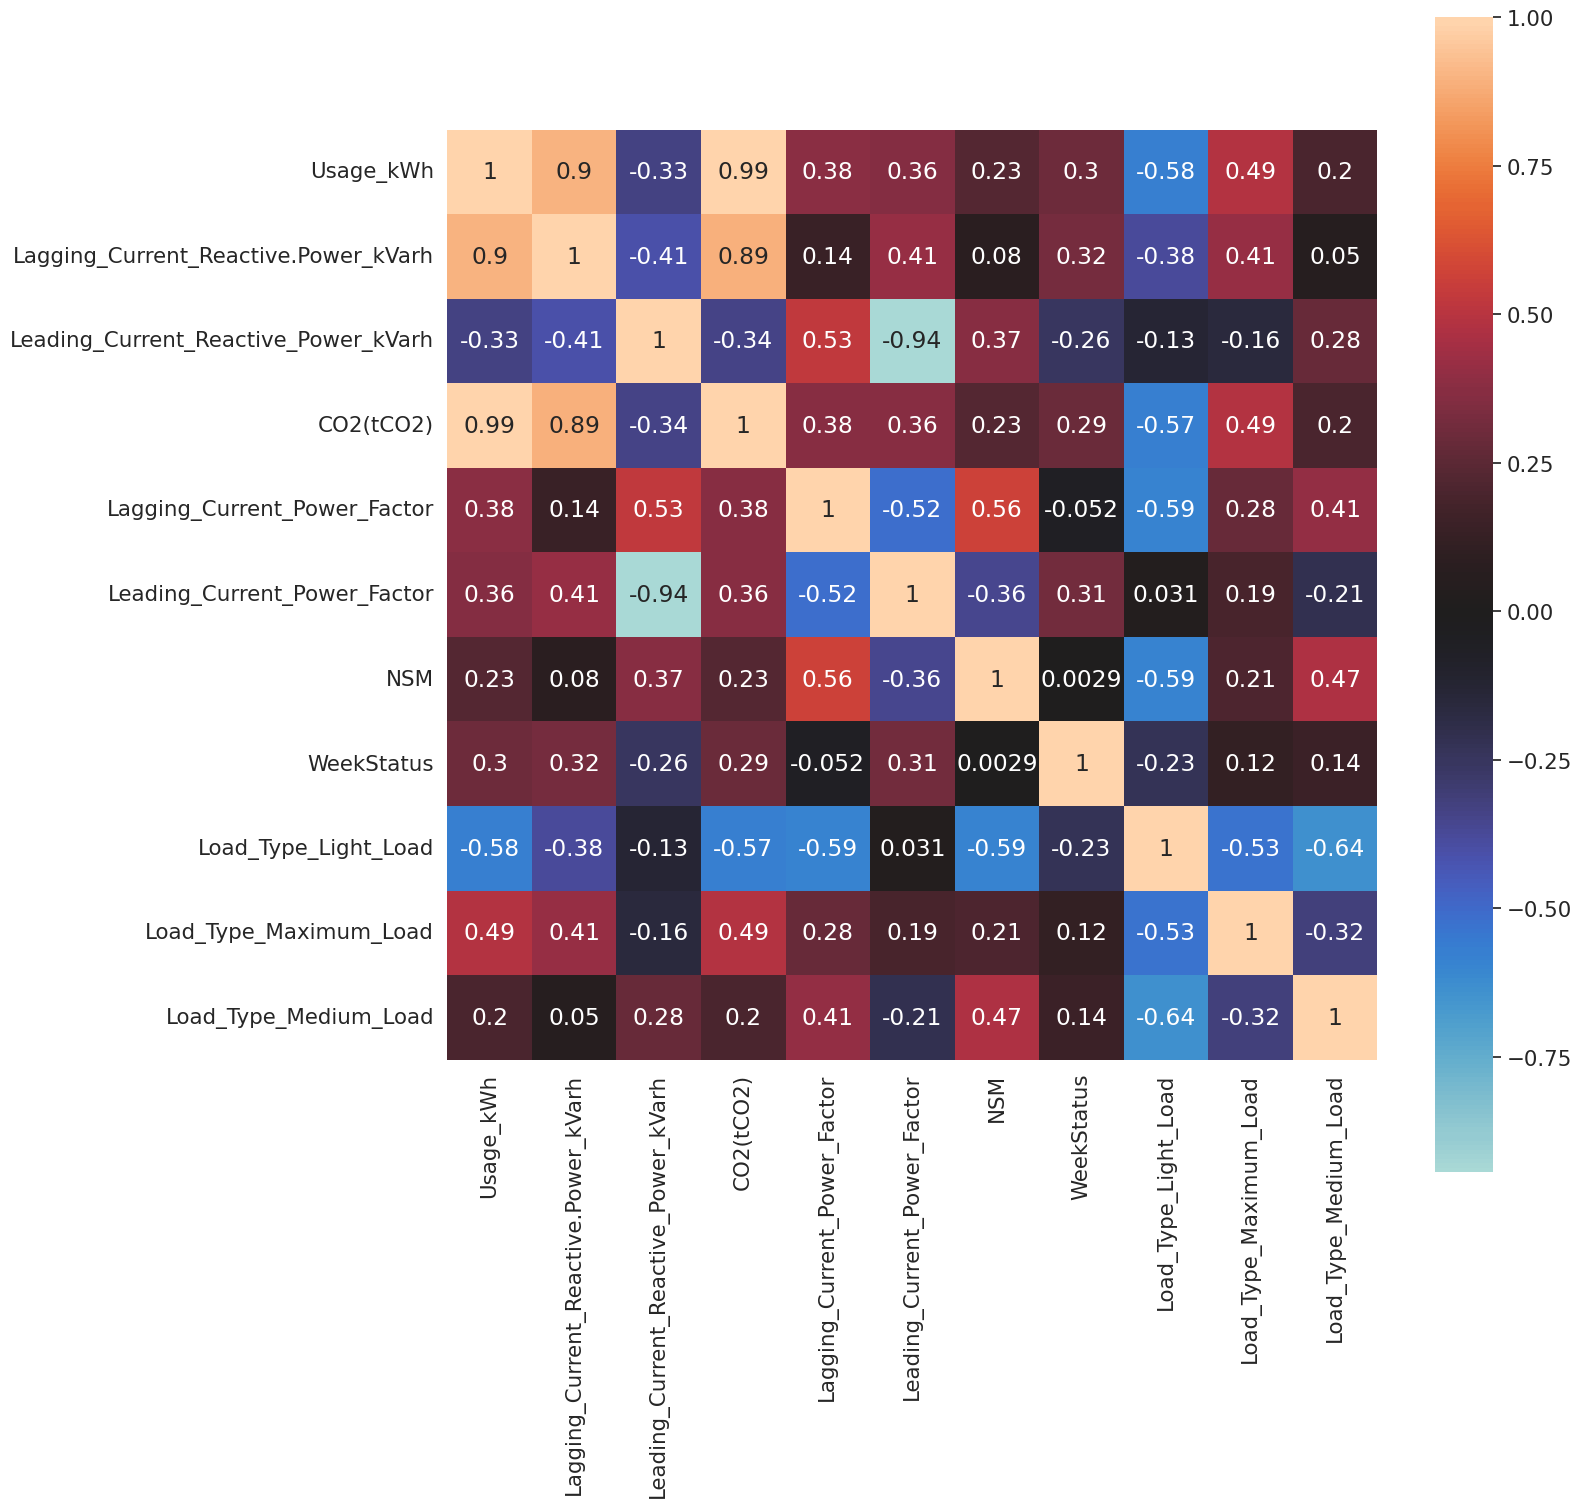

In [102]:
# Plots the correlations of each variable
plt.figure(figsize=(15,15))
sns.heatmap(
    df_encoded.sort_index().corr(),
    annot=True, center=0, square=True
)

In [110]:
# Solve classification problem using Logistic Regression
# Classifying whether the load is light or not light
X = df_encoded.drop(['Load_Type_Light_Load', 'Load_Type_Medium_Load', 'Load_Type_Maximum_Load'], axis=1)
y = df_encoded['Load_Type_Light_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg = LogisticRegression(max_iter=100000, n_jobs=-1)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=100000, n_jobs=-1)

In [111]:
# Evaluate the model using classification report, accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Predicting result from test variables
y_pred_test = log_reg.predict(X_test)
# Creates a classification report
print(classification_report(y_test, y_pred_test))

# It can be noticed that the metrics are all high (around 0.88-0.91)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5084
           1       0.91      0.89      0.90      5324

    accuracy                           0.89     10408
   macro avg       0.89      0.89      0.89     10408
weighted avg       0.89      0.89      0.89     10408



In [112]:
# Gets the accuracy score
y_pred_train = log_reg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# It can be seen that the metrics are also high (around 0.90)

Training-set accuracy score: 0.9002
Test-set accuracy score: 0.8940


In [113]:
# Gets the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4593  491]
 [ 612 4712]]


<Axes: >

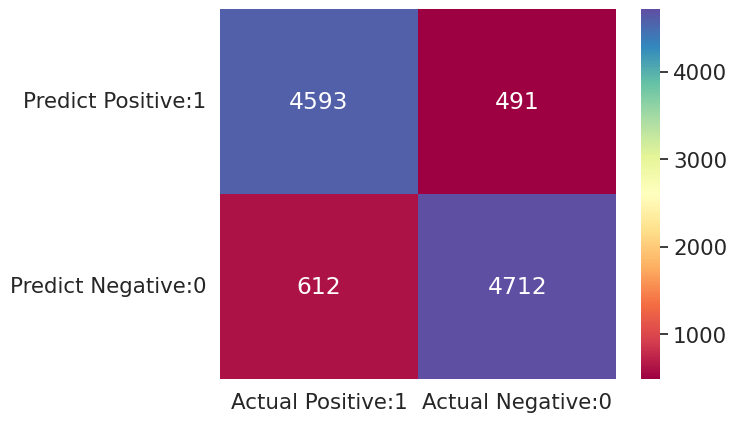

In [114]:
# Visualizing the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

In [115]:
# Gets the metrics available for confusion matrix
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy: {:.4f}\n'.format(accuracy))
misclassification = (FP + FN) / (TP + TN + FP + FN)
print('Misclassification Rate: {:.4f}\n'.format(misclassification))
recall = TP / (TP + FN)
print('True Positive Rate: {:.4f}\n'.format(recall))
false_positive = FP / (TN + FN)
print('False Positive Rate: {:.4f}\n'.format(false_positive))
true_negative = TN / (TN + FN)
print('True Negative Rate: {:.4f}\n'.format(true_negative))
true_positive = TP / (TP + FP)
print('Precision : {:.4f}\n'.format(true_positive))
prevalence = (TP + FN) / (TP + TN + FP + FN)
print('Prevalence: {:.4f}\n'.format(prevalence))

# It can be noticed that the accuracy, precision, true positive and false positive rate have decently high scores
# and a low false positive and misclassification rate
# which suggests a decent model

Accuracy: 0.8940

Misclassification Rate: 0.1060

True Positive Rate: 0.8824

False Positive Rate: 0.0922

True Negative Rate: 0.8850

Precision : 0.9034

Prevalence: 0.5001



Conclusion:

I can conclude that Logistic Regression is a way to solve binary classification problems, where it uses probabilities for each feature to predict whether it is one of two possible categories, in the case of the procedure if the person survived or did not survive in the titanic, and in my supplementary activity whether the load is light or not light.